<a href="https://colab.research.google.com/github/muskan-cloud/Pytorch_deeplearning/blob/main/04_pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

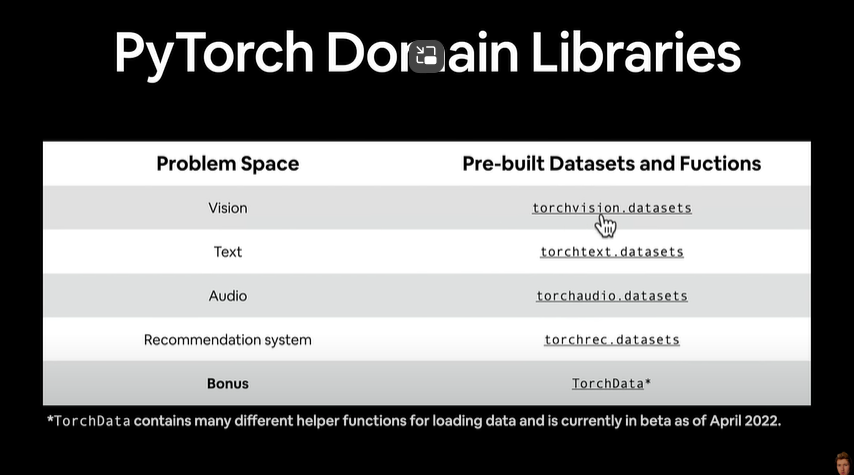

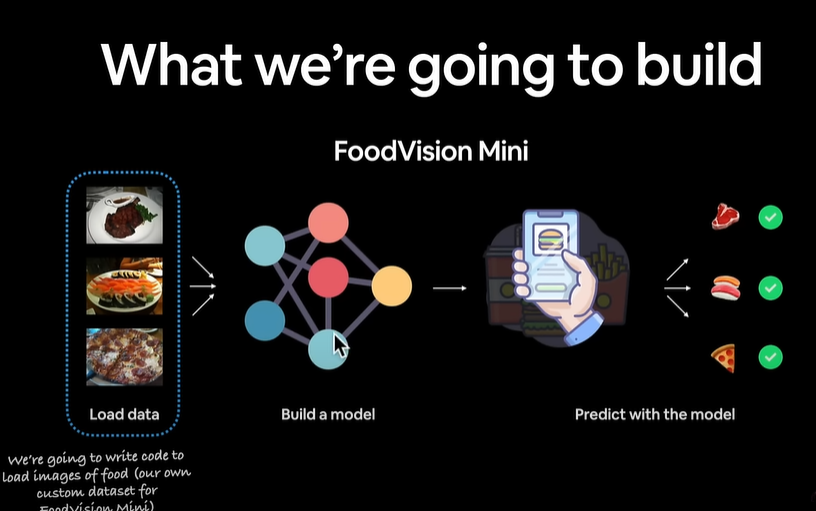

## Importation & device - agnoustic code

In [ ]:
import torch
from torch import nn

torch.__version__


'2.1.0+cu121'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Get Data
our dataset is a subset of the food101 dataset.

* food101 has 101 diff classes of food and 1000 images per classes(750 training ,250 testing)
* our dataset starts with 3classes of food and only 10% of the images (~75 training, ~25 testing)


In [ ]:
import requests
import zipfile
from pathlib import Path

# setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image folder doesn_t exist , downlaod it and prepare it...
if image_path.is_dir():
  print(f"{ image_path } directory already exists .. skipping download")
else:
  print(f"{ image_path } does not exist creating one ..")
  image_path.mkdir(parents = True, exist_ok = True)

# download pizza , steak and sushi data
with open(data_path/"pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

  # Unzip pizza, steak, sushi data
  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)



data/pizza_steak_sushi does not exist creating one ..
Unzipping pizza, steak, sushi data...


In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

## Becomimg one with the data (data preparation and data exploration)


In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

there are 2 directories and 0 images in 'data/pizza_steak_sushi'.
there are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
there are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
there are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
there are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
there are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
there are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
there are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
there are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [ ]:
# setup train and testing paths
train_dir  = image_path / "train"
test_dir = image_path / "test"

train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Visualizing an image

data/pizza_steak_sushi/test/pizza/3475871.jpg
pizza
Random image path : data/pizza_steak_sushi/test/pizza/3475871.jpg
Image class: pizza
Image height: 512
Image width: 512


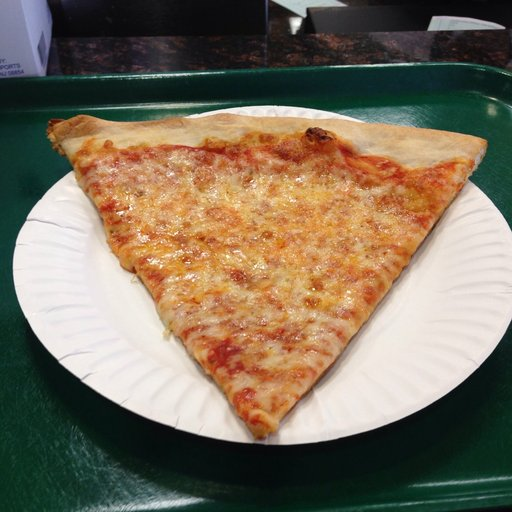

In [ ]:
import random
from PIL import Image

# set seed
random.seed(42)

# get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# get image class from the path name
image_class = random_image_path.parent.stem
print(image_class)

# open image
img = Image.open(random_image_path)

# print metadeta
print(f"Random image path : { random_image_path }")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: { img.width }")
img

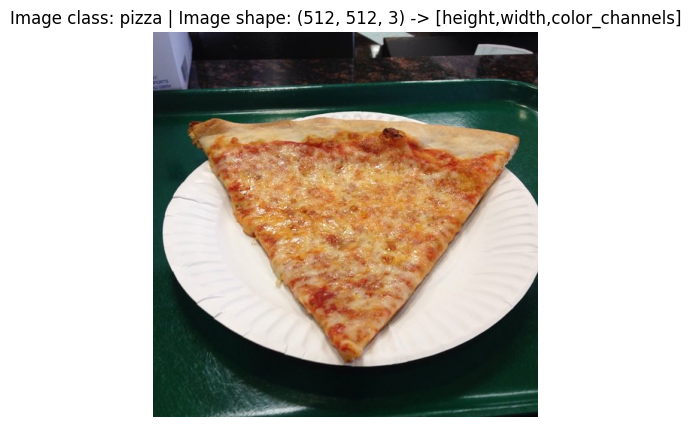

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn image into an array
img_as_array = np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize=(8,5))
plt.imshow(img_as_array)
plt.title(f"Image class: { image_class } | Image shape: {img_as_array.shape} -> [height,width,color_channels]")
plt.axis(False);

## Transforming Data
Before we can use our image data with Pytorch:
1. Turn your target data into tensors.
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader` , we'll call these `Dataset` and `DataLoader`.


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

### Transforming data with `torchvision.transforms`

In [ ]:
# write a transform for image

data_transform = transforms.Compose([
    # resize our images to 64x64
    transforms.Resize(size = (64,64)),
    # Flip the images randomdly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),

])